# Box and Whisker plots revisited:

An important website for this:
[stackoverflow](https://stackoverflow.com/questions/23461713/obtaining-values-used-in-boxplot-using-python-and-matplotlib)

This picture is taken from:
[towardsdatascience page](https://towardsdatascience.com/create-and-customize-boxplots-with-pythons-matplotlib-to-get-lots-of-insights-from-your-data-d561c9883643)



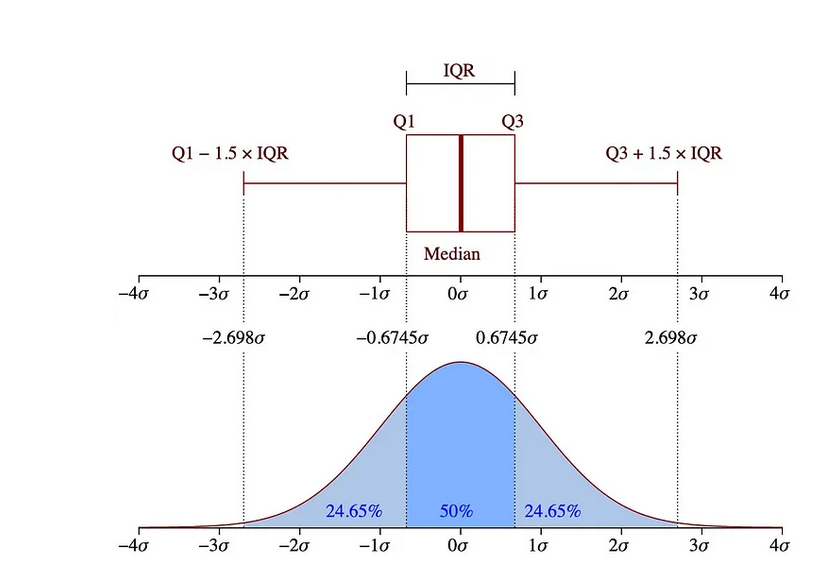

Consideremos los siguientes datos
$$[-250, -10, 1.5, -30, -20, 100, 300, 200 ] $$

Los pasos para construir el box-and-whisker plots are:

* Sorting (ordenar de menor a mayor)
$$[-250, -30, -20, -10, 1, 5, 100, 200, 300] $$


* Halla la media. Es el valor o sino hay medio el promedio de los medios.  El valor del medio es 1.

$$ Q_2 =  1 $$

* El valor $Q_1$ es la media de la parte izquirda de la lista, la cual incluye el valor medio $Q_2$.

$$ [-250, -30, -20, -10, 1 ]. $$
El medio es -20 ,  es decir

$$ Q_1 = -20  $$

* El valor $Q_3$ es la media del lado derecho (entre la media y el maximo, incluyendo ambos)
$$[1,5, 100, 200, 300 ] $$
De forma que

$$Q_3 = 100 $$

## Outliers: LLamados **fliers** en Python. Para esto necesitamos otras formulitas:

* **IQR**: Interquartile range:
$$ IQR = Q_3-Q_1 = 100-(-20)= 120 $$

* Marcas inferior y superior:
    $$marca \quad  inferior = Q_1 - 1.5 IQR = -20-1.5(120)= -160$$
    $$marca \quad  superior = Q_3 + 1.5 IQR = 100-1.5(120)= 280$$

* **lower whisker** : El mas pequeno (minimo) que es mayor  o igual al marca inferior. Como la marca inferior es -160, los que estan
de ahi para arriba (se incluye si esta en los datos): 
$$[-30, -20, -10, ....]  $$
El whisker inferior es

$$ \text{lower whisker=} - 30.$$ 

* **upper whisker** : El mas grande (maximo) que es menor o igual a la marka superior

$$[300] $$

$$ \text{upper whisker=} 300.$$ 


* **outliers** (fliers) son los que estan por fuera de los whiksers (por debajo, o por encima)


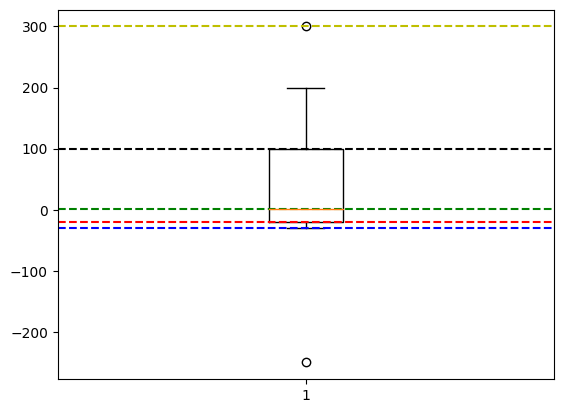

In [46]:
import numpy as np
import matplotlib.pyplot as plt

a = [-250, -10, 1., 5., -30, -20, 100, 300, 200 ]
data1=a
bp  = plt.boxplot(a, showfliers=True)

plt.axhline(y=-20, color='r', linestyle='dashed')
plt.axhline(y=-30, color='b', linestyle='dashed')
plt.axhline(y=1, color='g', linestyle='dashed')
plt.axhline(y=100, color='k', linestyle='dashed')
plt.axhline(y=300, color='y', linestyle='dashed')

In [47]:
bp['whiskers'][0].get_ydata()
bp['whiskers'][1].get_ydata()


array([100., 200.])

## Traigamos el ejemplo de la clase anterior:


{'whiskers': [<matplotlib.lines.Line2D at 0x7f291b886290>,
 'caps': [<matplotlib.lines.Line2D at 0x7f291b887bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f291b884b80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f291b887d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f291b884e80>],
 'means': []}

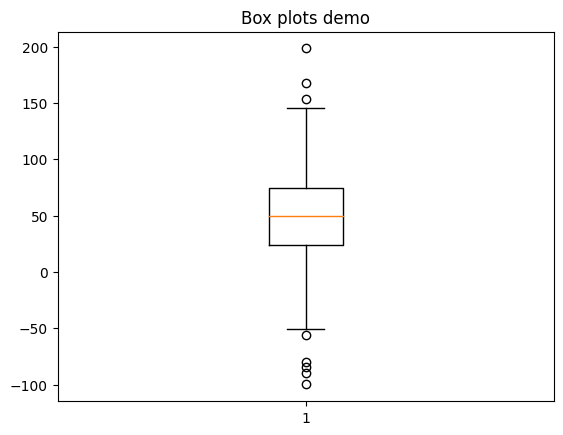

In [48]:
# importar numpy , matplotlib
np.random.seed(234343339)

spread = np.random.rand(50)*100
center = np.ones(25)*50

flier_high = np.random.rand(10)*100 + 100
flier_low = np.random.rand(10)*100 -100

data2 = np.concatenate((spread, center, flier_high, flier_low))
plt.title("Box plots demo")

plt.boxplot(data2, showfliers=True)


# Otro ejemplo de la clase anterior

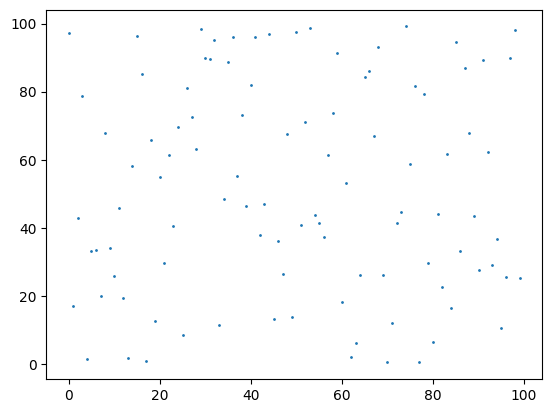

In [49]:
data3 = np.random.rand(100)*100
plt.plot(data3, 'o', markersize=1)

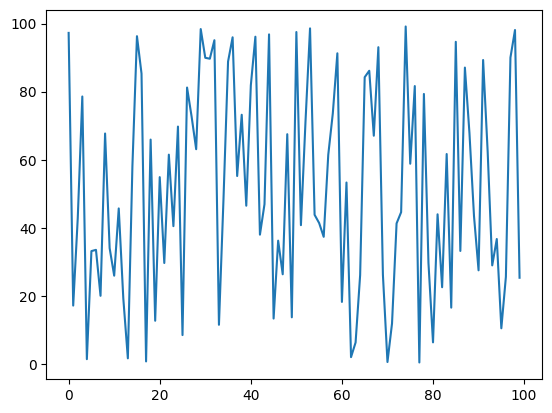

In [50]:
plt.plot(data3, markersize=0.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f291a584dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f291a5850c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f291a584850>],
 'medians': [<matplotlib.lines.Line2D at 0x7f291a585600>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f291a585a50>],
 'means': []}

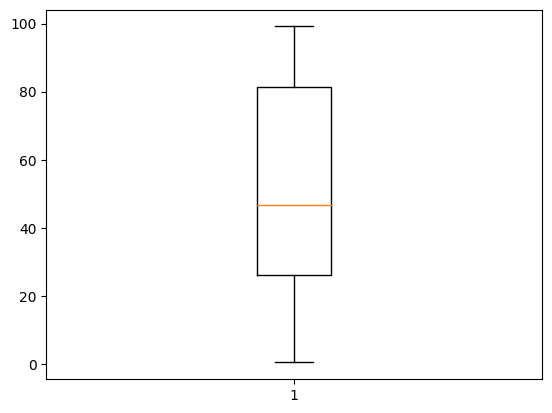

In [51]:
plt.boxplot(data3, showfliers=True)

## Como extraer datos de lo que retorna box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f291a6db730>,
 'caps': [<matplotlib.lines.Line2D at 0x7f291a6dbc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f291a6db490>],
 'medians': [<matplotlib.lines.Line2D at 0x7f291a70c1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f291a70c490>],
 'means': []}

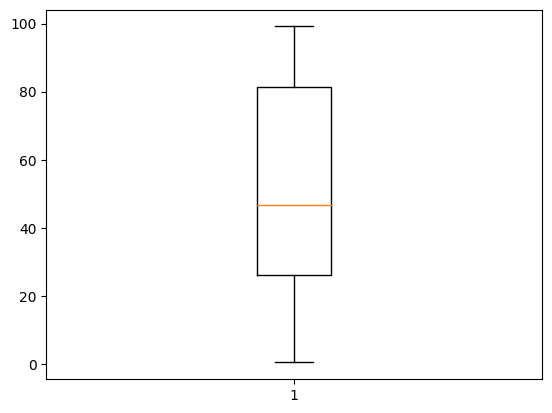

In [52]:
bp  = plt.boxplot(data3, showfliers=True)
bp

In [53]:
type(bp)

dict

In [54]:
?plt.boxplot

In [55]:
type(bp['whiskers'][0])

matplotlib.lines.Line2D

In [56]:
bp['whiskers'][0].get_ydata()

array([26.19420292,  0.48173921])

In [57]:
bp['whiskers'][1].get_ydata()

array([81.31462089, 99.13551355])

In [58]:
print('lower caps', bp['caps'][0].get_ydata()) # minimo
print('lower caps', bp['caps'][1].get_ydata()) # maximo


lower caps [0.48173921 0.48173921]
lower caps [99.13551355 99.13551355]


In [59]:
# caja
boxes = bp['boxes'][0].get_ydata()
boxes

array([26.19420292, 26.19420292, 81.31462089, 81.31462089, 26.19420292])

In [60]:
lb = bp['boxes'][0].get_ydata()[0]
ub = bp['boxes'][0].get_ydata()[2]


In [61]:
print("Q1, Q3", lb, ub)

Q1, Q3 26.19420291978574 81.31462089163617


In [62]:
bp['medians'][0].get_ydata()

array([46.73114167, 46.73114167])

In [63]:
# hagamos la lista de cosas que podemos extraer
# del box plot y la ponenmos en pandas
import pandas as pd
records=[]  # registros correspondientes a varios boxplots


myDict = {}
labels=['data3']
myDict['label']=labels[0]
myDict['lower whisker'] = bp['whiskers'][0].get_ydata()[1]
myDict['lower quartile'] = bp['boxes'][0].get_ydata()[1]
myDict['median'] = bp['medians'][0].get_ydata()[1]
myDict['upper quartile']= bp['boxes'][0].get_ydata()[2]
myDict['uuper whisker']=bp['whiskers'][1].get_ydata()[1]

records.append(myDict)

# pandas
df = pd.DataFrame(records)

df



,label,lower whisker,lower quartile,median,upper quartile,uuper whisker
0,data3,0.481739,26.194203,46.731142,81.314621,99.135514


## Calcular de los datos para crear un box and whisker plot


In [64]:
median = np.median(data3)
upper_quartile = np.percentile(data3, 75)
lower_quartile = np.percentile(data3, 25)

# para los whiskers necesitamos
iqr = upper_quartile - lower_quartile
upperMark = upper_quartile + 1.5*iqr
lowerMark = lower_quartile - 1.5*iqr
upperWhisker = data3[ data3 <= upperMark].max()
lowerWhisker = data3[ data3 >= lowerMark].min()



In [65]:
print(median, upper_quartile, lower_quartile, upperWhisker, lowerWhisker)

46.73114167425272 81.31462089163617 26.19420291978574 99.13551355199752 0.4817392081223115


In [66]:
upperMark

163.9952478494118

## Automatizacion.


In [67]:
# get data to use in box and whisker's plot

def get_data(dataList):
    n = len(dataList)
    print("n=",n)

    records = []
    for i in range(n):
        myDict = {}

        data = dataList[i]
        print("max =", data.max())
        print("min =", data.min())

        median = np.median(data)

        print("median=",median)
        upper_quartile = np.percentile(data, 75)
        lower_quartile = np.percentile(data, 25)

        # para los whiskers necesitamos
        iqr = upper_quartile - lower_quartile
        upperMark = upper_quartile + 1.5*iqr
        lowerMark = lower_quartile - 1.5*iqr
        upperWhisker = data[ data <= upperMark].max()
        lowerWhisker = data[ data >= lowerMark].min()


        # llenar el diccionario
        myDict['label']=f"data[{i}]"
        myDict['min']= data.min()
        myDict['lower whisker'] = lowerWhisker
        myDict['lower quartile'] = lower_quartile
        myDict['median'] = median
        myDict['upper quartile']= upper_quartile
        myDict['uuper whisker']=upperWhisker
        myDict['max'] = data.max()

        records.append(myDict)

    # pandas
    df = pd.DataFrame(records)
    return df



        






In [68]:
dataList = [np.array(data1), np.array(data2), np.array(data3)]

df2 = get_data(dataList)
df2

n= 3
max = 300.0
min = -250.0
median= 1.0
max = 198.3117924682913
min = -99.88962268417214
median= 50.0
max = 99.13551355199752
min = 0.4817392081223115
median= 46.73114167425272


,label,min,lower whisker,lower quartile,median,upper quartile,uuper whisker,max
0,data[0],-250.000000,-30.000000,-20.000000,1.000000,100.000000,200.000000,300.000000
1,data[1],-99.889623,-51.016066,24.203054,50.000000,74.442554,145.707375,198.311792
2,data[2],0.481739,0.481739,26.194203,46.731142,81.314621,99.135514,99.135514


In [24]:
data1==data3

<ipython-input-24-b7dc5e61c2cf>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  data1==data3


False

In [41]:
a

[-250, -30, -20, -10, 1.5, 100, 200, 300]

In [29]:
np.percentile(a, 25)

-22.5

In [45]:
np.median(a)

-4.25

In [122]:
data4 = [-500, 540, 23, 4, 3, 1, 650, 600]

## Programa para obtener informacion desde los box-whisker

In [140]:
def get_box_plot_data(bp,n):
    records = []

    for i in range(n):
        print(i)
        myDict = {}
        myDict['label'] = f'data[{i}]'

        
        myDict['lower whisker'] = bp['boxes'][0].get_ydata()[1]
        myDict['lower quartile']= bp['boxes'][i].get_ydata()[0]
        myDict['median']=bp['medians'][i].get_ydata()[1]
        myDict['upper quartile']= bp['boxes'][i].get_ydata()[2]
        myDict['upper whisker']=bp['whiskers'][2*i+1].get_ydata()[1]
    
        records.append(myDict)

    return pd.DataFrame(records)


In [141]:
dataList=[data1, data2, data3, data4]

n==== 4
0
1
2
3


,label,lower whisker,lower quartile,median,upper quartile,upper whisker
0,data[0],-20.0,-20.000000,1.000000,100.000000,200.000000
1,data[1],-20.0,24.203054,50.000000,74.442554,145.707375
2,data[2],-20.0,26.194203,46.731142,81.314621,99.135514
3,data[3],-20.0,2.500000,13.500000,555.000000,650.000000


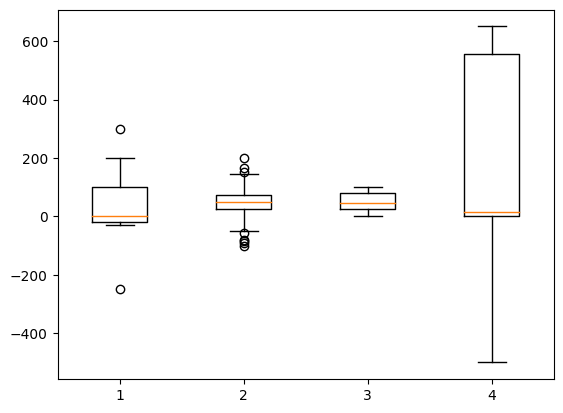

In [142]:
n = len(dataList)
print("n====",n)
bp=plt.boxplot(dataList)

df2 = get_box_plot_data(bp,n)
df2